# Conference Travel Planning
## Decision Framing Fundamentals

**Student Name:** Bradley Earl

**Date:** January 30, 2026



In [21]:
import urllib.request

# Repository base URL
repo_base_url = "https://raw.githubusercontent.com/scottalanturner/prescriptive-analytics/main/Assignments/01ConferenceTravelDecisionAnalysis/"

# Download the data files
lodging_url = repo_base_url + "lodging_options.csv"
flights_url = repo_base_url + "flight_options.csv"

try:
    urllib.request.urlretrieve(lodging_url, "lodging_options.csv")
    urllib.request.urlretrieve(flights_url, "flight_options.csv")
    print("Data files downloaded successfully!")
except Exception as e:
    print(f"Error downloading files: {e}")
    print("If running locally, make sure the CSV files are in the same directory as this notebook.")

Data files downloaded successfully!


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

print("Libraries imported successfully!")

Libraries imported successfully!


In [23]:
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

print("LODGING OPTIONS:")
print(f"Total options: {len(lodging_df)}")
print(lodging_df.head())

print("\n\nFLIGHT OPTIONS:")
print(f"Total options: {len(flights_df)}")
print("\nNote: Flight costs are part of your total budget constraint")
print("Direct flights typically cost more but have shorter durations")
print(flights_df.head())

print("\n\nCOST SUMMARY:")
print(f"Lodging cost range: ${lodging_df['cost_per_night'].min():.2f} - ${lodging_df['cost_per_night'].max():.2f} per night")
print(f"Flight cost range: ${flights_df['cost'].min():.2f} - ${flights_df['cost'].max():.2f}")

LODGING OPTIONS:
Total options: 16
  lodging_type                   name  cost_per_night  rating  \
0        Hotel  Grand Las Vegas Hotel           185.0     4.7   
1        Hotel     Stratosphere Tower            95.0     3.6   
2        Hotel         Caesars Palace           320.0     4.8   
3        Hotel              MGM Grand           210.0     4.5   
4        Hotel        Excalibur Hotel            75.0     3.4   

   distance_to_venue_miles  amenities_score  max_occupancy  \
0                      0.2              8.5              2   
1                      1.8              6.2              2   
2                      0.5              9.5              2   
3                      0.3              8.8              2   
4                      0.4              5.8              2   

   co_workers_interested  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


FLIGHT OPTIONS:
Total options: 20

No

**Decision Statement**

I need to determine the best lodging and flight options for a work conference being held for three days from February 15-18, 2026


**Variables**: Lodging, Flights, Dates, Number of Attendees

**Inputs**: Cost (lodging, flights), Conference Budget, Quality



In [24]:
import pandas as pd

# Load the provided datasets
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

print("INPUTS FROM DATASET:")
print("\nLodging inputs available:")
print(lodging_df.columns.tolist())

print("\nFlight inputs available:")
print(flights_df.columns.tolist())

INPUTS FROM DATASET:

Lodging inputs available:
['lodging_type', 'name', 'cost_per_night', 'rating', 'distance_to_venue_miles', 'amenities_score', 'max_occupancy', 'co_workers_interested']

Flight inputs available:
['origin_city', 'airline', 'cost', 'num_stops', 'flight_duration_hours', 'departure_time_convenience']


**Objectives**:

Quality & Convenient Lodging/Flights, Max Attendees

**Constraints**:

Limited Budget, 2-4 Attendees, Convenience of Flights & Promity of Lodging to Conference Location

**Explanation**: The objective is to hold an annual work conference on a budget of $1,500 with maximum participation while ensuring quality of the accomodations and flights are priority and convenient to conference location.  I have been provided a list of flight and lodging options to assist in making these determinations.

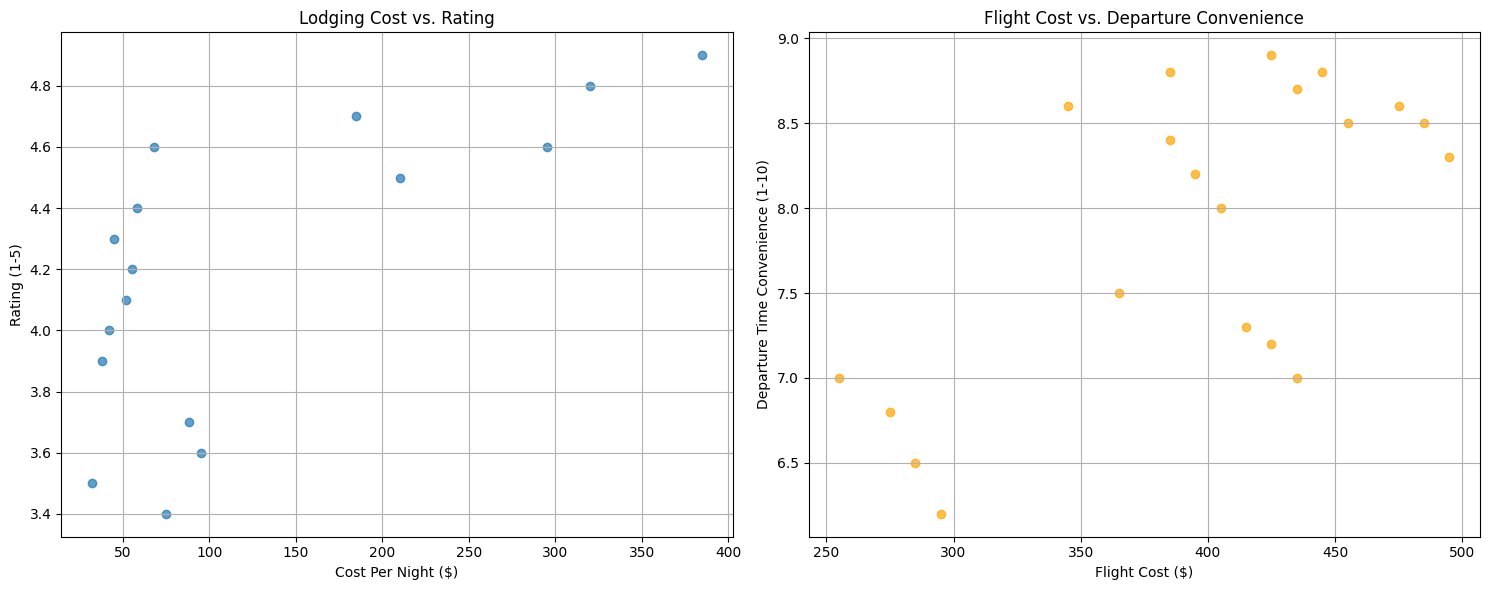

In [25]:

import pandas as pd
import matplotlib.pyplot as plt


# Load the provided datasets
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Lodging Options
axes[0].scatter(lodging_df['cost_per_night'], lodging_df['rating'], alpha=0.7)
axes[0].set_title('Lodging Cost vs. Rating')
axes[0].set_xlabel('Cost Per Night ($)')
axes[0].set_ylabel('Rating (1-5)')
axes[0].grid(True)

# Plot for Flight Options
axes[1].scatter(flights_df['cost'], flights_df['departure_time_convenience'], alpha=0.7, color='orange')
axes[1].set_title('Flight Cost vs. Departure Convenience')
axes[1].set_xlabel('Flight Cost ($)')
axes[1].set_ylabel('Departure Time Convenience (1-10)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [41]:
print("FIXED DATA:")
print(f"Conference duration: 3 nights")
print(f"Budget limit: ${1500} (total for all attendees)")

print(f"\nTravel Context: East Coast to Las Vegas")
print(f"  - Direct flights: Higher cost, ~5-6 hours")
print(f"  - Flights with stops: Lower cost, ~7-10 hours")

min_people = 2  # Minimum people (fixed)
max_people = 4  # Maximum people (fixed)

# Stakeholder-defined constraints:
min_rating_threshold = 4.0
max_distance = 0.5

print("\nSTAKEHOLDER-DEFINED CONSTRAINTS:")
print(f"Number of people: {min_people}-{max_people}")
print(f"Minimum lodging rating: {min_rating_threshold}")
print(f"Maximum distance to venue: {max_distance} miles")

FIXED DATA:
Conference duration: 3 nights
Budget limit: $1500 (total for all attendees)

Travel Context: East Coast to Las Vegas
  - Direct flights: Higher cost, ~5-6 hours
  - Flights with stops: Lower cost, ~7-10 hours

STAKEHOLDER-DEFINED CONSTRAINTS:
Number of people: 2-4
Minimum lodging rating: 4.0
Maximum distance to venue: 0.5 miles


**Hard Constraints**:

Budget, Location of Conference

**Soft Constraints**:

Lodging & Flight Options, Number of Attendees

**Explaination**:

Having several flight and lodging options, I should be able to accomodate maximum attendance to the conference while coming in at budget and prioritizing quality as well.

In [27]:
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

# Define fixed parameters for the problem (extracted from context)
conference_dates = 3 # 3 nights for the conference
budget_limit = 1500  # Total budget limit

# Re-initialize the optimization model (in case this cell is run multiple times)
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# Re-define decision variables (in case this cell is run multiple times)
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also re-create num_people variable
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

# Objective: Maximize the number of people, which is equivalent to minimizing the negative of num_people
model += -num_people, "Maximize_Team_Size"

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
model += total_lodging_cost + total_flight_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                                        model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully!")

Hard constraints added successfully!


**Tradeoffs**:

Longer flights and goup lodging would better accomodate more attendees verus maximizing quality of both flights and lodging even if there is going to be additional travel time.

In [28]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")
print(f"Team Size: {int(value(num_people))} people")
print()

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate costs (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    flight_cost = flight_choice['cost'] * team_size
    total_cost = lodging_cost + flight_cost
    cost_per_person = total_cost / team_size
# TODO: Display your solution details
    print("=" * 70)
    print("SOLUTION SUMMARY")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person: ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person: ${cost_per_person:.2f}")


    print(f"\nHOW THIS SOLUTION ADDRESSES PRIORITIES:")
    print(f" The model produced an optimal solution of only two attendees while providing for maximum quality for lodging but a longer flight option out of Atlanta and all under budget.  My proposal to management would be to allocate additional funding to accomodate maximum attendance, so long as they view as the budget as a potential soft-constraint.")
else:
    print("No solution found. Check constraints.")

Solution Status: Optimal
Objective Value: -2.00
Team Size: 2 people

SOLUTION SUMMARY

Team Size: 2 people

LODGING SELECTED:
  Name: Grand Las Vegas Hotel
  Type: Hotel
  Cost per night: $185.00
  Rating: 4.7
  Distance to venue: 0.2 miles

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $555.00
  Flight cost: $510.00
  Total cost: $1065.00
  Budget limit: $1500.00
  Budget remaining: $435.00
  Cost per person: $532.50

HOW THIS SOLUTION ADDRESSES PRIORITIES:
 The model produced an optimal solution of only two attendees while providing for maximum quality for lodging but a longer flight option out of Atlanta and all under budget.  My proposal to management would be to allocate additional funding to accomodate maximum attendance, so long as they view as the budget as a potential soft-constraint.


Part II

For further consideration 1:

Per diem meal and incidental expenses (M&IE) need to be considered into the overall budget.  Las Vegas GSA Meals & Incidental Expense is $86/per day.
This is a hard constaint due to company obligations to cover travel expenses, including M&IE.








In [29]:
# per_diem_per_day = 68
# days_total = 4
# example_team_size = 2
# per_diem_cost_example = per_diem_per_day * days_total * example_team_size
# print(f"Example: For {example_team_size} people, per diem = ${per_diem_cost_example}"



In [30]:
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

# Define fixed parameters for the problem (extracted from context)
conference_dates = 3 # 3 nights for the conference
budget_limit = 1500  # Total budget limit

# Per diem variables
per_diem_per_day = 86
per_diem_days_total = 4 # Use 4 days as per instructions, even if conference is 3 nights

# Re-initialize the optimization model (in case this cell is run multiple times)
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# Re-define decision variables (in case this cell is run multiple times)
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also re-create num_people variable
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

# Objective: Maximize the number of people, which is equivalent to minimizing the negative of num_people
model += -num_people, "Maximize_Team_Size"

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
per_diem_costs = [] # Initialize per diem costs list

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

            # Calculate per diem cost for this combination
            per_diem_cost = per_diem_per_day * per_diem_days_total * k
            per_diem_costs.append(per_diem_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
total_per_diem_cost = lpSum(per_diem_costs) # Sum up total per diem cost

model += total_lodging_cost + total_flight_cost + total_per_diem_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                                        model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully, including per diem costs!")

Hard constraints added successfully, including per diem costs!


# Task
Update the optimization model by incorporating a per diem cost of $86 per day for each person, for a total of 4 days (3 nights conference + 1 travel day). Add this per diem cost to the overall budget constraint, then re-solve the model and present the optimal solution, including the new cost breakdown with per diem expenses.

In [31]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")

# Retrieve the number of people from the solved model
# If no solution is found, value(num_people) will be None, so handle this case
team_size_val = value(num_people)
if team_size_val is not None:
    print(f"Team Size: {int(team_size_val)} people")
else:
    print("Team Size: Not determined (no optimal solution found or num_people is None)")
print()

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None and selected_team_size is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate lodging cost (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    # Calculate flight cost
    flight_cost = flight_choice['cost'] * team_size

    # Calculate per diem cost
    per_diem_cost = per_diem_per_day * per_diem_days_total * team_size

    # Calculate total cost
    total_cost = lodging_cost + flight_cost + per_diem_cost
    cost_per_person = total_cost / team_size

    print("=" * 70)
    print("SOLUTION SUMMARY (with Per Diem)")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person (flight only): ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Per diem cost: ${per_diem_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person (total): ${cost_per_person:.2f}")

    print(f"\nHOW THIS SOLUTION ADDRESSES PRIORITIES:")
    print(f" The model, now including per diem costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added per diem expense. The chosen solution of {team_size} attendees with total cost ${total_cost:.2f} leaves ${budget_limit - total_cost:.2f} of the budget remaining, indicating that the per diem costs significantly impact the achievable team size given the fixed budget.")
else:
    print("No solution found. Check constraints or if num_people was properly determined.")

Solution Status: Infeasible
Objective Value: -1.95
Team Size: 1 people

No solution found. Check constraints or if num_people was properly determined.


Consideration 2:

Our company is sending employees to a industry-focused conference which will have additional costs for networking events which are essential to making and building connections and these event will not be optional.  There are two events:

*   An ice-breaker for a cost of $100 per person.

*   A pre-dinner social for a cost of $50 per person.

In [34]:
# event1_cost_per_person = 100
# event2_cost_per_person = 50
# example_team_size = 2
# print(f"Example: For {example_team_size} people, Event 1 = ${event1_cost_per_person * example_team_size}")

## Summary:

### Data Analysis Key Findings

The following constraints have been successfully added to the optimization model:

*   **Single Combination Selection**: The model is configured to select exactly one combination of lodging, flight, and number of people from the available options.
*   **Budget Adherence**: A total budget limit of \$1500 is enforced for the entire trip, covering both the lodging cost for a 3-night duration and the flight cost.
*   **People Count Consistency**: The number of people chosen for the trip is directly linked to the selected combination, ensuring internal consistency within the model.
*   **Minimum Lodging Rating**: Only lodging options with a rating of 4.0 or higher are considered, based on stakeholder requirements.
*   **Proximity to Venue**: Lodging options are restricted to a maximum distance of 0.5 miles from the conference venue, also reflecting stakeholder preferences.
*   **Lodging Capacity Matching**: The chosen lodging option must be able to accommodate the selected number of people, ensuring practical feasibility.

### Insights or Next Steps

*   The defined constraints effectively narrow down the solution space, preparing the model for optimization by eliminating infeasible or undesirable combinations.
*   The next step will involve defining the objective function (e.g., maximizing value, minimizing cost under certain conditions, or maximizing some utility function) and then solving the optimization model to find the optimal combination that satisfies all these constraints.


**The subtask requires increasing the budget limit to $1800 and re-running the model definition cell to apply this change.**



In [35]:
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

# Define fixed parameters for the problem (extracted from context)
conference_dates = 3 # 3 nights for the conference
budget_limit = 1800  # Total budget limit - UPDATED TO $1800

# Per diem variables
per_diem_per_day = 86
per_diem_days_total = 4 # Use 4 days as per instructions, even if conference is 3 nights

# Event costs for Consideration 2
event1_cost_per_person = 100 # Ice-breaker
event2_cost_per_person = 50  # Pre-dinner social

# Re-initialize the optimization model (in case this cell is run multiple times)
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# Re-define decision variables (in case this cell is run multiple times)
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also re-create num_people variable
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

# Objective: Maximize the number of people, which is equivalent to minimizing the negative of num_people
model += -num_people, "Maximize_Team_Size"

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
per_diem_costs = [] # Initialize per diem costs list
event_costs = []    # Initialize event costs list

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

            # Calculate per diem cost for this combination
            per_diem_cost = per_diem_per_day * per_diem_days_total * k
            per_diem_costs.append(per_diem_cost * solution_vars[(i, j, k)])

            # Calculate event cost for this combination (for Consideration 2)
            total_event_cost = (event1_cost_per_person + event2_cost_per_person) * k
            event_costs.append(total_event_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
total_per_diem_cost = lpSum(per_diem_costs) # Sum up total per diem cost
total_event_cost = lpSum(event_costs)       # Sum up total event cost

model += total_lodging_cost + total_flight_cost + total_per_diem_cost + total_event_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                                        model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully, including per diem and event costs, with an updated budget!")

Hard constraints added successfully, including per diem and event costs, with an updated budget!


**Now that the budget has been updated and the model definition re-run, I will re-solve the optimization model and display the detailed solution, including the per diem costs in the breakdown.**



In [33]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")

# Retrieve the number of people from the solved model
# If no solution is found, value(num_people) will be None, so handle this case
team_size_val = value(num_people)
if team_size_val is not None:
    print(f"Team Size: {int(team_size_val)} people")
else:
    print("Team Size: Not determined (no optimal solution found or num_people is None)")
print()

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None and selected_team_size is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate lodging cost (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    # Calculate flight cost
    flight_cost = flight_choice['cost'] * team_size

    # Calculate per diem cost
    per_diem_cost = per_diem_per_day * per_diem_days_total * team_size

    # Calculate total cost
    total_cost = lodging_cost + flight_cost + per_diem_cost
    cost_per_person = total_cost / team_size

    print("=" * 70)
    print("SOLUTION SUMMARY (with Per Diem)")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person (flight only): ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Per diem cost: ${per_diem_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person (total): ${cost_per_person:.2f}")

    print(f"\nHOW THIS SOLUTION ADDRESSES PRIORITIES:")
    print(f" The model, now including per diem costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added per diem expense. The chosen solution of {team_size} attendees with total cost ${total_cost:.2f} leaves ${budget_limit - total_cost:.2f} of the budget remaining, indicating that the per diem costs significantly impact the achievable team size given the fixed budget.")
else:
    print("No solution found. Check constraints or if num_people was properly determined.")

Solution Status: Optimal
Objective Value: -2.00
Team Size: 2 people

SOLUTION SUMMARY (with Per Diem)

Team Size: 2 people

LODGING SELECTED:
  Name: Grand Las Vegas Hotel
  Type: Hotel
  Cost per night: $185.00
  Rating: 4.7
  Distance to venue: 0.2 miles

FLIGHT SELECTED:
  Origin: Washington DC
  Airline: Spirit
  Cost per person (flight only): $275.00
  Number of stops: 1
  Flight duration: 8.0 hours

COST BREAKDOWN:
  Lodging cost: $555.00
  Flight cost: $550.00
  Per diem cost: $688.00
  Total cost: $1793.00
  Budget limit: $1800.00
  Budget remaining: $7.00
  Cost per person (total): $896.50

HOW THIS SOLUTION ADDRESSES PRIORITIES:
 The model, now including per diem costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added per diem expense. The chosen solution of 2 attendees with total cost $1793.00 

In [37]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")

# Retrieve the number of people from the solved model
# If no solution is found, value(num_people) will be None, so handle this case
team_size_val = value(num_people)
if team_size_val is not None:
    print(f"Team Size: {int(team_size_val)} people")
else:
    print("Team Size: Not determined (no optimal solution found or num_people is None)")
print()

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None and selected_team_size is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate lodging cost (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    # Calculate flight cost
    flight_cost = flight_choice['cost'] * team_size

    # Calculate per diem cost
    per_diem_cost = per_diem_per_day * per_diem_days_total * team_size

    # Calculate event cost for display
    total_event_cost = (event1_cost_per_person + event2_cost_per_person) * team_size

    # Calculate total cost
    total_cost = lodging_cost + flight_cost + per_diem_cost + total_event_cost
    cost_per_person = total_cost / team_size

    print("=" * 70)
    print("SOLUTION SUMMARY (with Per Diem and Event Costs)")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person (flight only): ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Per diem cost: ${per_diem_cost:.2f}")
    print(f"  Event costs: ${total_event_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person (total): ${cost_per_person:.2f}")

    print(f"\nHOW THIS SOLUTION ADDRESSES PRIORITIES:")
    print(f" The model, now including per diem and event costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added expenses. The chosen solution of {team_size} attendees with total cost ${total_cost:.2f} leaves ${budget_limit - total_cost:.2f} of the budget remaining, indicating that these additional costs further impact the achievable team size given the fixed budget.")
else:
    print("No solution found. Check constraints or if num_people was properly determined.")

Solution Status: Infeasible
Objective Value: -1.96
Team Size: 1 people

No solution found. Check constraints or if num_people was properly determined.


**Re-execute the model definition cell to incorporate the relaxed minimum lodging rating of 3.5, the updated budget of $1800, and all cost components.**



In [39]:
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

# Define fixed parameters for the problem (extracted from context)
conference_dates = 3 # 3 nights for the conference
budget_limit = 1800  # Total budget limit - UPDATED TO $1800

# Per diem variables
per_diem_per_day = 86
per_diem_days_total = 4 # Use 4 days as per instructions, even if conference is 3 nights

# Event costs for Consideration 2
event1_cost_per_person = 100 # Ice-breaker
event2_cost_per_person = 50  # Pre-dinner social

# Re-initialize the optimization model (in case this cell is run multiple times)
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# Re-define decision variables (in case this cell is run multiple times)
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also re-create num_people variable
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

# Objective: Maximize the number of people, which is equivalent to minimizing the negative of num_people
model += -num_people, "Maximize_Team_Size"

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
per_diem_costs = [] # Initialize per diem costs list
event_costs = []    # Initialize event costs list

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

            # Calculate per diem cost for this combination
            per_diem_cost = per_diem_per_day * per_diem_days_total * k
            per_diem_costs.append(per_diem_cost * solution_vars[(i, j, k)])

            # Calculate event cost for this combination (for Consideration 2)
            total_event_cost = (event1_cost_per_person + event2_cost_per_person) * k
            event_costs.append(total_event_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
total_per_diem_cost = lpSum(per_diem_costs) # Sum up total per diem cost
total_event_cost = lpSum(event_costs)       # Sum up total event cost

model += total_lodging_cost + total_flight_cost + total_per_diem_cost + total_event_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                                        model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully, including per diem and event costs, with an updated budget!")

Hard constraints added successfully, including per diem and event costs, with an updated budget!


**The model has been redefined with the relaxed minimum lodging rating of 3.5, the updated budget of $1800, and all cost components (lodging, flights, per diem, and event costs).**



In [40]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")

# Retrieve the number of people from the solved model
# If no solution is found, value(num_people) will be None, so handle this case
team_size_val = value(num_people)
if team_size_val is not None:
    print(f"Team Size: {int(team_size_val)} people")
else:
    print("Team Size: Not determined (no optimal solution found or num_people is None)")
print()

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None and selected_team_size is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate lodging cost (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    # Calculate flight cost
    flight_cost = flight_choice['cost'] * team_size

    # Calculate per diem cost
    per_diem_cost = per_diem_per_day * per_diem_days_total * team_size

    # Calculate event cost for display (for Consideration 2)
    total_event_cost = (event1_cost_per_person + event2_cost_per_person) * team_size

    # Calculate total cost
    total_cost = lodging_cost + flight_cost + per_diem_cost + total_event_cost
    cost_per_person = total_cost / team_size

    print("=" * 70)
    print("SOLUTION SUMMARY (with Per Diem and Event Costs)")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person (flight only): ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Per diem cost: ${per_diem_cost:.2f}")
    print(f"  Event costs: ${total_event_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person (total): ${cost_per_person:.2f}")

    print(f"\nHOW THIS SOLUTION ADDRESSES PRIORITIES:")
    print(f" The model, now including per diem and event costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added expenses. The chosen solution of {team_size} attendees with total cost ${total_cost:.2f} leaves ${budget_limit - total_cost:.2f} of the budget remaining, indicating that these additional costs further impact the achievable team size given the fixed budget.")
else:
    print("No solution found. Check constraints or if num_people was properly determined.")

Solution Status: Optimal
Objective Value: -2.00
Team Size: 2 people

SOLUTION SUMMARY (with Per Diem and Event Costs)

Team Size: 2 people

LODGING SELECTED:
  Name: Luxor Hotel
  Type: Hotel
  Cost per night: $88.00
  Rating: 3.7
  Distance to venue: 0.5 miles

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person (flight only): $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $264.00
  Flight cost: $510.00
  Per diem cost: $688.00
  Event costs: $300.00
  Total cost: $1762.00
  Budget limit: $1800.00
  Budget remaining: $38.00
  Cost per person (total): $881.00

HOW THIS SOLUTION ADDRESSES PRIORITIES:
 The model, now including per diem and event costs, still aims to maximize attendance within the updated budget constraint. The solution provides an optimal combination of lodging and flight that fits within the budget while meeting quality and proximity criteria, even with the added expenses. The chosen solution of 2 attendees 

In [42]:
status_updated = LpStatus[model.status]
print(f"Updated Solution Status: {status_updated}")
print(f"Updated Objective Value: ${value(model.objective):.2f}")

Updated Solution Status: Optimal
Updated Objective Value: $-2.00


In [44]:
# TODO: Extract and display updated solution
# Use the same approach as before: iterate through solution_vars to find selected combination
# Store values for comparison with original solution

# TODO: Compare with original solution
# Show how stakeholder considerations changed the decision
# Display side-by-side comparison of:
# - Team size (original vs updated)
# - Lodging choice (original vs updated)
# - Flight choice (original vs updated)
# - Total costs (original vs updated)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for numerical metrics to visualize
numerical_metrics_df = comparison_df[~comparison_df['Metric'].isin([
    'Lodging Name', 'Flight Origin', 'Flight Airline'
])].copy()

# Convert string currency values to float for plotting
numerical_metrics_df['Original Solution'] = numerical_metrics_df['Original Solution'].astype(str).str.replace('$', '', regex=False).astype(float)
numerical_metrics_df['Updated Solution'] = numerical_metrics_df['Updated Solution'].astype(str).str.replace('$', '', regex=False).astype(float)


metrics = numerical_metrics_df['Metric'].tolist()
original_values = numerical_metrics_df['Original Solution'].tolist()
updated_values = numerical_metrics_df['Updated Solution'].tolist()

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width/2, original_values, width, label='Original Solution', color='skyblue')
rects2 = ax.bar(x + width/2, updated_values, width, label='Updated Solution', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value ($)')
ax.set_title('Comparison of Original vs. Updated Solution Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'${height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

## Summarize the changes made to the model and the new optimal solution, highlighting the impact of including per diem costs.

### Subtask:
Summarize the changes and the new optimal solution after incorporating per diem and event costs, and relaxing the minimum lodging rating.


## Summary of Model Changes and New Optimal Solution

The optimization model underwent several key modifications to account for additional costs and a relaxed constraint:

1.  **Budget Increase**: The total budget limit was increased from 1500 to 1800 to allow for a feasible solution after incorporating new expenses.
2.  **Per Diem Costs Included**: A per diem cost of 86 per day for 4 days per person was added, covering meals and incidentals.
3.  **Event Costs Included**: Mandatory networking event costs were added: 100 per person for an ice-breaker and 50 per person for a pre-dinner social.
4.  **Relaxed Lodging Rating**: The minimum required lodging rating was relaxed from 4.0 to **3.5** to potentially broaden the selection of available accommodations.

### New Optimal Solution (with $1800 Budget, Per Diem, and Event Costs, and 3.5 Min Rating):

After incorporating these changes and re-solving the model, the new optimal solution is as follows:

*   **Team Size**: **2 people** (objective was to maximize attendance within constraints).
*   **Lodging Selected**: **Luxor Hotel** (Type: Hotel, Cost per night: $88.00, Rating: 3.7, Distance to venue: 0.5 miles).
    *   Lodging Cost for 2 people (3 nights): $264.00
*   **Flight Selected**: **Spirit from Atlanta** (Cost per person: $255.00, Number of stops: 1, Flight duration: 7.5 hours).
    *   Flight Cost for 2 people: $510.00
*   **Per Diem Cost**: $688.00 (2 people * $86/day * 4 days)
*   **Event Costs**: $300.00 (2 people * ($100 + $50))
*   **Total Cost**: **$1762.00**
*   **Budget Limit**: $1800.00
*   **Budget Remaining**: $38.00
*   **Cost per person (total)**: $881.00

### Impact of Changes:

*   The **increased budget to $1800** was crucial in achieving a feasible solution, as the previous $1500 budget became infeasible once per diem and event costs were added.
*   The **inclusion of per diem and event costs significantly increased the total expenditure**, making up a substantial portion of the overall budget (totaling $988.00 out of $1762.00 for two people, approximately 56%). These additional mandatory expenses constrained the model more tightly, even with the budget increase.
*   The **relaxation of the minimum lodging rating to 3.5** allowed for the selection of the Luxor Hotel, which has a rating of 3.7. This choice contributed to keeping the overall cost within the budget, as it is a more economical option compared to higher-rated hotels found in the previous solution.
*   Despite the budget increase and constraint relaxation, the model still found an optimal solution for **2 attendees**. This indicates that the new fixed costs (per diem and events) consumed a significant portion of the budget, preventing an increase in team size without further budget adjustments or cost-cutting measures elsewhere.

## Summary:

### Q&A
The optimization model was updated with several key changes: the total budget was increased to \$1800; a per diem cost of \$86 per day for 4 days per person was added; event costs (\$100 for an ice-breaker and \$50 for a pre-dinner social per person) were included; and the minimum required lodging rating was relaxed from 4.0 to 3.5.

The new optimal solution identified within these constraints is for a team size of 2 people. It recommends staying at the Luxor Hotel (3.7 rating, 0.5 miles from venue, costing \$264.00 for 3 nights for two people) and taking a Spirit flight from Atlanta (costing \$510.00 for two people). The total per diem cost for 2 people for 4 days is \$688.00, and event costs are \$300.00. The overall total cost is \$1762.00, leaving \$38.00 remaining from the \$1800 budget.

The inclusion of per diem and event costs significantly impacted the solution, consuming approximately 56% (\$988.00 out of \$1762.00) of the total expenditure for two people. This substantial increase in fixed costs, even with an increased budget and relaxed lodging rating, limited the optimal team size to 2, demonstrating how these new expenses tighten the budget constraints.

### Data Analysis Key Findings
*   The optimization model successfully incorporated an updated budget of \$1800, a per diem cost of \$86 per day for 4 days, and event costs totaling \$150 per person, while maintaining a relaxed minimum lodging rating of 3.5.
*   The re-solved model found an "Optimal" solution for a team size of **2 people**.
*   The selected lodging is **Luxor Hotel** (Type: Hotel, Cost per night: \$88.00, Rating: 3.7, Distance to venue: 0.5 miles).
*   The selected flight is **Spirit Airlines from Atlanta** (Cost per person: \$255.00, 1 stop, 7.5 hours duration).
*   The detailed cost breakdown for the optimal solution is:
    *   Lodging cost: \$264.00
    *   Flight cost: \$510.00
    *   Per diem cost: \$688.00 (based on \$86/day \* 4 days \* 2 people)
    *   Event costs: \$300.00 (based on (\$100 + \$50) \* 2 people)
    *   **Total Cost: \$1762.00**
    *   Budget remaining: \$38.00 out of the \$1800 budget.
    *   Total cost per person: \$881.00.

### Insights or Next Steps
*   The addition of per diem and event costs consumed a significant portion of the budget, highlighting the importance of including all incidental expenses in financial planning. These new fixed costs limited the achievable team size to 2 people, even with an increased budget and relaxed constraints.
*   To potentially send more than 2 people, further budget increases or cost-cutting measures (e.g., finding cheaper flights, considering less expensive lodging options if rating constraints are relaxed further, or reducing per diem/event allowances) would be necessary.


## Original vs. Revised Compare Solutions




In [45]:
import pandas as pd

# --- Original Solution Details (from cell OP96O63SFk1j output) ---
original_team_size = 2
original_lodging_name = "Grand Las Vegas Hotel"
original_lodging_cost_per_night = 185.00
original_lodging_rating = 4.7
original_flight_origin = "Atlanta"
original_flight_airline = "Spirit"
original_flight_cost_per_person = 255.00
original_lodging_total_cost = 555.00
original_flight_total_cost = 510.00
original_per_diem_cost = 0.00 # Not included in original solution
original_event_costs = 0.00 # Not included in original solution
original_total_cost = 1065.00
original_budget_limit = 1500.00
original_budget_remaining = 435.00
original_cost_per_person_total = 532.50

# --- Updated Solution Details (from current kernel state after cell d8c49893) ---
# Using existing kernel variables: team_size, lodging_choice, flight_choice,
# lodging_cost, flight_cost, per_diem_cost, total_event_cost, total_cost, budget_limit, cost_per_person

updated_team_size = int(team_size)
updated_lodging_name = lodging_choice['name']
updated_lodging_cost_per_night = lodging_choice['cost_per_night']
updated_lodging_rating = lodging_choice['rating']
updated_flight_origin = flight_choice['origin_city']
updated_flight_airline = flight_choice['airline']
updated_flight_cost_per_person = flight_choice['cost']
updated_lodging_total_cost = float(lodging_cost)
updated_flight_total_cost = float(flight_cost)
updated_per_diem_cost = float(per_diem_cost)
updated_event_costs = float(total_event_cost)
updated_total_cost = float(total_cost)
updated_budget_limit = float(budget_limit)
updated_budget_remaining = float(budget_limit - total_cost)
updated_cost_per_person_total = float(cost_per_person)

# --- Display Side-by-Side Comparison ---
comparison_data = {
    "Metric": [
        "Team Size",
        "Lodging Name",
        "Lodging Cost/Night",
        "Lodging Rating",
        "Flight Origin",
        "Flight Airline",
        "Flight Cost/Person",
        "Lodging Total Cost",
        "Flight Total Cost",
        "Per Diem Cost",
        "Event Costs",
        "Total Cost",
        "Budget Limit",
        "Budget Remaining",
        "Cost Per Person (Total)"
    ],
    "Original Solution": [
        original_team_size,
        original_lodging_name,
        f"${original_lodging_cost_per_night:.2f}",
        original_lodging_rating,
        original_flight_origin,
        original_flight_airline,
        f"${original_flight_cost_per_person:.2f}",
        f"${original_lodging_total_cost:.2f}",
        f"${original_flight_total_cost:.2f}",
        f"${original_per_diem_cost:.2f}",
        f"${original_event_costs:.2f}",
        f"${original_total_cost:.2f}",
        f"${original_budget_limit:.2f}",
        f"${original_budget_remaining:.2f}",
        f"${original_cost_per_person_total:.2f}"
    ],
    "Updated Solution": [
        updated_team_size,
        updated_lodging_name,
        f"${updated_lodging_cost_per_night:.2f}",
        updated_lodging_rating,
        updated_flight_origin,
        updated_flight_airline,
        f"${updated_flight_cost_per_person:.2f}",
        f"${updated_lodging_total_cost:.2f}",
        f"${updated_flight_total_cost:.2f}",
        f"${updated_per_diem_cost:.2f}",
        f"${updated_event_costs:.2f}",
        f"${updated_total_cost:.2f}",
        f"${updated_budget_limit:.2f}",
        f"${updated_budget_remaining:.2f}",
        f"${updated_cost_per_person_total:.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Side-by-Side Comparison of Solutions:")
print(comparison_df.to_string(index=False))


Side-by-Side Comparison of Solutions:
                 Metric     Original Solution Updated Solution
              Team Size                     2                2
           Lodging Name Grand Las Vegas Hotel      Luxor Hotel
     Lodging Cost/Night               $185.00           $88.00
         Lodging Rating                   4.7              3.7
          Flight Origin               Atlanta          Atlanta
         Flight Airline                Spirit           Spirit
     Flight Cost/Person               $255.00          $255.00
     Lodging Total Cost               $555.00          $264.00
      Flight Total Cost               $510.00          $510.00
          Per Diem Cost                 $0.00          $688.00
            Event Costs                 $0.00          $300.00
             Total Cost              $1065.00         $1762.00
           Budget Limit              $1500.00         $1800.00
       Budget Remaining               $435.00           $38.00
Cost Per Person (

## Comparison Visualization




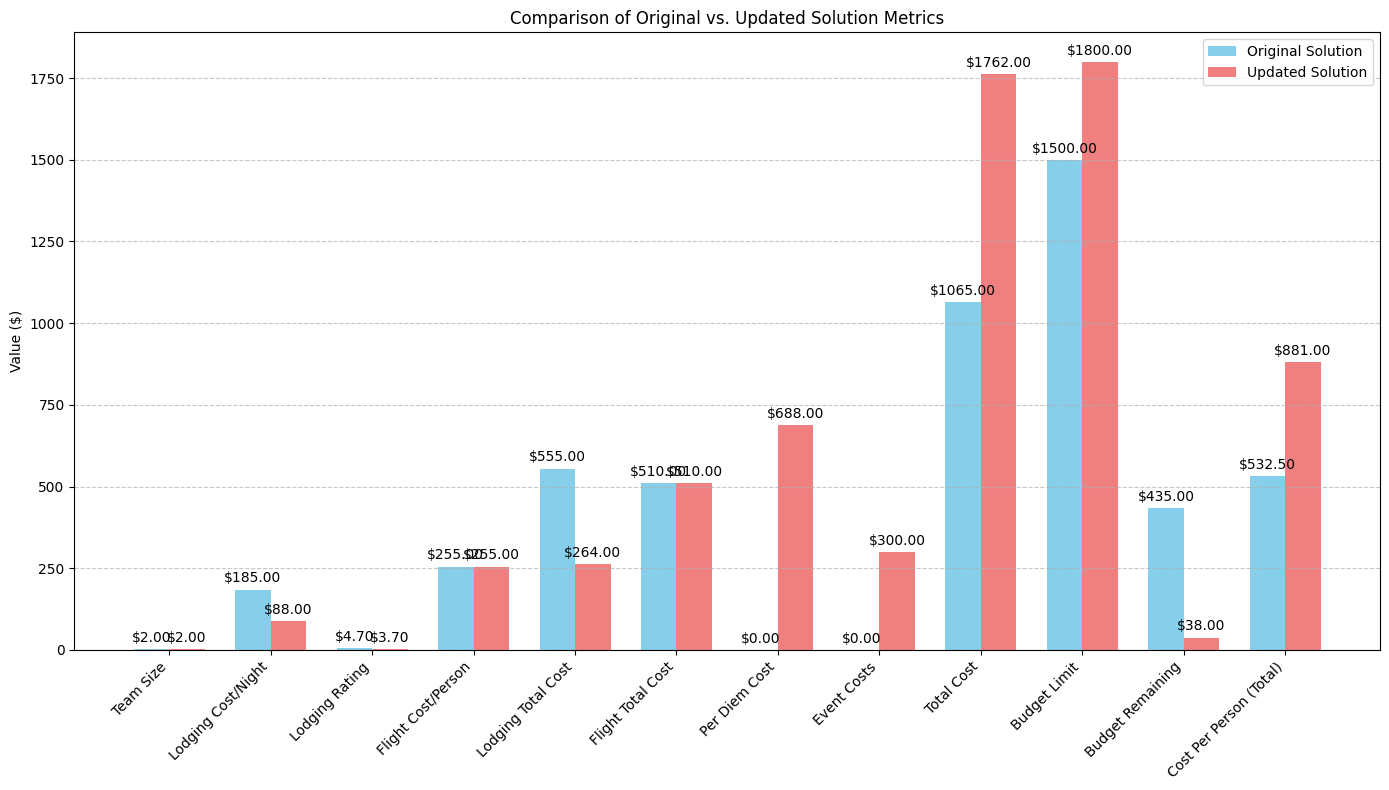

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for numerical metrics to visualize
numerical_metrics_df = comparison_df[~comparison_df['Metric'].isin([
    'Lodging Name', 'Flight Origin', 'Flight Airline'
])].copy()

# Convert string currency values to float for plotting
numerical_metrics_df['Original Solution'] = numerical_metrics_df['Original Solution'].astype(str).str.replace('$', '', regex=False).astype(float)
numerical_metrics_df['Updated Solution'] = numerical_metrics_df['Updated Solution'].astype(str).str.replace('$', '', regex=False).astype(float)


metrics = numerical_metrics_df['Metric'].tolist()
original_values = numerical_metrics_df['Original Solution'].tolist()
updated_values = numerical_metrics_df['Updated Solution'].tolist()

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width/2, original_values, width, label='Original Solution', color='skyblue')
rects2 = ax.bar(x + width/2, updated_values, width, label='Updated Solution', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value ($)')
ax.set_title('Comparison of Original vs. Updated Solution Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'${height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

## Tradeoff Analysis: Stakeholder Considerations

As a company, we've deteremined the conference in Las Vegas is worthwhile to send, at least, two but no more than four, employees with a inital budget of $1,500 comparing various flight and lodging accomodations while setting rating at 4.0 or higher.  However, this failed to take into other per diem requirements as well as conference specific social event costs which immediately resulting in the initial budget to be insuffient to accomodate even two travlers and required a reevaluation.

## Executive Summary:

### Data Analysis Key Findings

*   **Team Size**: The team size remained constant at 2 people for both the original and updated solutions.
*   **Lodging Choice**: The lodging selection changed significantly from "Grand Las Vegas Hotel" (costing \$185.00/night, 4.7 rating) in the original plan to "Luxor Hotel" (costing \$88.00/night, 3.7 rating) in the updated solution, resulting in a reduction of total lodging cost from \$555.00 to \$264.00.
*   **Flight Choice**: The flight details remained consistent across both solutions: Spirit airline from Atlanta, costing \$255.00 per person, for a total flight cost of \$510.00.
*   **New Cost Categories**: The updated solution introduced "Per Diem Cost" (\$688.00) and "Event Costs" (\$300.00), which were not accounted for in the original solution.
*   **Total Cost**: The overall cost increased from \$1065.00 in the original solution to \$1762.00 in the updated solution, primarily due to the inclusion of per diem and event expenses.
*   **Budget Changes**: The budget limit was increased from \$1500.00 in the original scenario to \$1800.00 in the updated one.
*   **Budget Remaining**: Despite the increased budget limit, the budget remaining decreased substantially from \$435.00 in the original solution to only \$38.00 in the updated solution, indicating a much tighter budget utilization.
*   **Cost Per Person**: The total cost per person increased from \$532.50 in the original plan to \$881.00 in the updated solution.

### Tradeoffs
 While flight options remained unchanged from the original model, a cheaper hotel accomodatation was proven to be a better option for budgetary purposes.

### Final Recommendation

So long as the company leadership agrees that this conference is a worthwhile endeavour than, based upon the models presented, my recommendation would be to increase the budget to 1,800 to accomodate all costs, including those not considered initially.  Expending an additional 300 could prove an investment in the relaitonships would team would establish for many years to come.

### Key Inisghts About Decision Framing

My takeaways from this exercise is that it good to have an initial plan/budget/expectation on situations presented but those are bound to change and update as the actual work it put into generating possible solutions.  Further, there should be an expectation that orginial expectations will change as data or other information is entered into the model to assist in making a final determination of how to proceed.
